<a href="https://colab.research.google.com/github/talithaanindya/ProjectPrakPPh/blob/main/ProjectUAS_PPh_ibynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os # Import the os module

# Tambahkan baris ini untuk menampilkan file di direktori saat ini
print("File di direktori saat ini:")
print(os.listdir('.'))
print("-" * 30)

# Muat data dari file CSV
try:
    df_aset = pd.read_csv('Tabel-Aset-Tetap.csv')
except FileNotFoundError:
    print("Error: File 'Tabel-Aset-Tetap.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.", file=sys.stderr)
    # sys.exit(1) # Komen baris ini untuk mencegah SystemExit di Jupyter dan melihat error lain jika ada
except Exception as e: # Tangani exception lain yang mungkin terjadi saat membaca file
    print(f"Error saat membaca 'Tabel-Aset-Tetap.csv': {e}", file=sys.stderr)
    # sys.exit(1)


try:
    df_fiskal = pd.read_csv('Tabel Kebijakan Fiskal.csv')
except FileNotFoundError:
    print("Error: File 'Tabel Kebijakan Fiskal.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.", file=sys.stderr)
    # sys.exit(1)
except Exception as e:
    print(f"Error saat membaca 'Tabel Kebijakan Fiskal.csv': {e}", file=sys.stderr)
    # sys.exit(1)

try:
    df_keuangan = pd.read_csv('Tabel Transaksi Keuangan.csv')
except FileNotFoundError:
    print("Error: File 'Tabel Transaksi Keuangan.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.", file=sys.stderr)
    # sys.exit(1)
except Exception as e:
    print(f"Error saat membaca 'Tabel Transaksi Keuangan.csv': {e}", file=sys.stderr)
    # sys.exit(1)

# Tambahkan pengecekan apakah dataframe berhasil dimuat sebelum melanjutkan
if 'df_aset' not in locals() or 'df_fiskal' not in locals() or 'df_keuangan' not in locals():
    print("\nSatu atau lebih file CSV gagal dimuat. Menghentikan eksekusi.", file=sys.stderr)
    # Jika Anda ingin script benar-benar berhenti di sini di Jupyter tanpa error traceback yang aneh,
    # Anda bisa menggunakan `return` jika ini dalam fungsi, atau hanya membiarkan script berakhir.
    # Untuk tujuan debugging, membiarkannya berlanjut *setelah* pesan error mungkin berguna
    # untuk melihat apakah ada variabel yang terdefinisi sebagian.
    # Namun, untuk menghindari error selanjutnya karena dataframe yang tidak terdefinisi,
    # sebaiknya hentikan eksekusi atau pastikan variabel df_* ada (meskipun None atau kosong).

    # Sebagai alternatif sederhana untuk mencegah error lebih lanjut:
    df_aset = pd.DataFrame() if 'df_aset' not in locals() else df_aset
    df_fiskal = pd.DataFrame() if 'df_fiskal' not in locals() else df_fiskal
    df_keuangan = pd.DataFrame() if 'df_keuangan' not in locals() else df_keuangan

# --- Analisis Kolom ---
# Lanjutkan dengan analisis hanya jika dataframe tidak kosong
if not df_aset.empty:
    print("\n--- Analisis Data Tabel-Aset-Tetap.csv ---")
    print(df_aset.info())
    print("\nBeberapa baris pertama:")
    print(df_aset.head())
    print("\nStatistik deskriptif:")
    print(df_aset.describe())
else:
    print("\ndf_aset kosong atau gagal dimuat, analisis dilewati.")


if not df_fiskal.empty:
    print("\n--- Analisis Data Tabel Kebijakan Fiskal.csv ---")
    print(df_fiskal.info())
    print("\nBeberapa baris pertama:")
    print(df_fiskal.head())
    print("\nStatistik deskriptif:")
    print(df_fiskal.describe())
else:
    print("\ndf_fiskal kosong atau gagal dimuat, analisis dilewati.")


if not df_keuangan.empty:
    print("\n--- Analisis Data Tabel Transaksi Keuangan.csv ---")
    print(df_keuangan.info())
    print("\nBeberapa baris pertama:")
    print(df_keuangan.head())
    print("\nStatistik deskriptif:")
    print(df_keuangan.describe())
else:
     print("\ndf_keuangan kosong atau gagal dimuat, analisis dilewati.")


# --- Visualisasi Data (Contoh Sederhana) ---

# Visualisasi untuk df_aset (contoh: plot berdasarkan salah satu kolom numerik)
if not df_aset.empty and len(df_aset.select_dtypes(include='number').columns) > 0:
    kolom_numerik_aset = df_aset.select_dtypes(include='number').columns[0]
    plt.figure(figsize=(10, 6))
    plt.bar(df_aset.index, df_aset[kolom_numerik_aset], color='skyblue')
    plt.title(f'Contoh Visualisasi Kolom Numerik di Tabel-Aset-Tetap.csv: {kolom_numerik_aset}')
    plt.xlabel('Indeks')
    plt.ylabel(kolom_numerik_aset)
    plt.show()
elif not df_aset.empty:
    print("\nTidak ada kolom numerik di Tabel-Aset-Tetap.csv untuk visualisasi sederhana.")


# Visualisasi untuk df_fiskal (contoh: histogram dari salah satu kolom numerik)
if not df_fiskal.empty and len(df_fiskal.select_dtypes(include='number').columns) > 0:
    kolom_numerik_fiskal = df_fiskal.select_dtypes(include='number').columns[0]
    plt.figure(figsize=(10, 6))
    plt.hist(df_fiskal[kolom_numerik_fiskal], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Contoh Histogram Kolom Numerik di Tabel Kebijakan Fiskal.csv: {kolom_numerik_fiskal}')
    plt.xlabel(kolom_numerik_fiskal)
    plt.ylabel('Frekuensi')
    plt.show()
elif not df_fiskal.empty:
    print("\nTidak ada kolom numerik di Tabel Kebijakan Fiskal.csv untuk visualisasi sederhana.")


# Visualisasi untuk df_keuangan (contoh: scatter plot antar dua kolom numerik jika ada)
if not df_keuangan.empty:
    kolom_numerik_keuangan = df_keuangan.select_dtypes(include='number').columns
    if len(kolom_numerik_keuangan) >= 2:
        plt.figure(figsize=(10, 6))
        plt.scatter(df_keuangan[kolom_numerik_keuangan[0]], df_keuangan[kolom_numerik_keuangan[1]], color='salmon')
        plt.title(f'Contoh Scatter Plot di Tabel Transaksi Keuangan.csv: {kolom_numerik_keuangan[0]} vs {kolom_numerik_keuangan[1]}')
        plt.xlabel(kolom_numerik_keuangan[0])
        plt.ylabel(kolom_numerik_keuangan[1])
        plt.show()
    elif len(kolom_numerik_keuangan) == 1:
        print("\nHanya ada satu kolom numerik di Tabel Transaksi Keuangan.csv. Scatter plot membutuhkan minimal dua kolom.")
    else:
         print("\nTidak ada kolom numerik di Tabel Transaksi Keuangan.csv untuk visualisasi sederhana.")


# --- Analisis Komprehensif (Contoh) ---

print("\n--- Analisis Komprehensif (Contoh) ---")

# Contoh: Korelasi antar kolom numerik (jika ada)
if not df_aset.empty and len(df_aset.select_dtypes(include='number').columns) > 1:
    print("\nMatriks Korelasi Tabel-Aset-Tetap.csv:")
    print(df_aset.corr())

if not df_fiskal.empty and len(df_fiskal.select_dtypes(include='number').columns) > 1:
    print("\nMatriks Korelasi Tabel Kebijakan Fiskal.csv:")
    print(df_fiskal.corr())

if not df_keuangan.empty and len(df_keuangan.select_dtypes(include='number').columns) > 1:
    print("\nMatriks Korelasi Tabel Transaksi Keuangan.csv:")
    print(df_keuangan.corr())

# Contoh: Menemukan nilai unik dalam kolom kategorikal (jika ada)
if not df_aset.empty:
    for col in df_aset.select_dtypes(include='object').columns:
        print(f"\nNilai unik di kolom '{col}' (Tabel-Aset-Tetap.csv):")
        print(df_aset[col].unique())

if not df_fiskal.empty:
    for col in df_fiskal.select_dtypes(include='object').columns:
        print(f"\nNilai unik di kolom '{col}' (Tabel Kebijakan Fiskal.csv):")
        print(df_fiskal[col].unique())

if not df_keuangan.empty:
    for col in df_keuangan.select_dtypes(include='object').columns:
        print(f"\nNilai unik di kolom '{col}' (Tabel Transaksi Keuangan.csv):")
        print(df_keuangan[col].unique())

# Anda bisa menambahkan analisis lain yang relevan dengan data Anda
# Contoh: pengelompokan data, analisis deret waktu (jika ada kolom tanggal), dll.

File di direktori saat ini:
['.config', 'sample_data']
------------------------------

df_aset kosong atau gagal dimuat, analisis dilewati.

df_fiskal kosong atau gagal dimuat, analisis dilewati.

df_keuangan kosong atau gagal dimuat, analisis dilewati.

--- Analisis Komprehensif (Contoh) ---


Error: File 'Tabel-Aset-Tetap.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.
Error: File 'Tabel Kebijakan Fiskal.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.
Error: File 'Tabel Transaksi Keuangan.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau tentukan path lengkap.

Satu atau lebih file CSV gagal dimuat. Menghentikan eksekusi.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Menggunakan seaborn untuk visualisasi yang lebih menarik

# Muat data dari file CSV
try:
    df_aset = pd.read_csv('Tabel-Aset-Tetap.csv')
    df_fiskal = pd.read_csv('Tabel Kebijakan Fiskal.csv')
    df_keuangan = pd.read_csv('Tabel Transaksi Keuangan.csv')
except FileNotFoundError:
    print("Pastikan file CSV berada di direktori yang sama atau tentukan path lengkap.")
    # Di lingkungan non-interaktif seperti script, exit() bisa digunakan.
    # Di Colab/Jupyter, Anda mungkin ingin menangani ini dengan cara lain
    # agar sel lain bisa tetap berjalan jika Anda mau.
    # Untuk contoh ini, kita akan melanjutkan tapi dengan dataframe kosong
    # jika file tidak ditemukan.
    df_aset = pd.DataFrame()
    df_fiskal = pd.DataFrame()
    df_keuangan = pd.DataFrame()


# --- Visualisasi Data Berwarna ---

print("\n--- Visualisasi Data Berwarna ---")

# Visualisasi untuk df_aset
if not df_aset.empty:
    print("\nVisualisasi untuk Tabel-Aset-Tetap.csv:")
    kolom_numerik_aset = df_aset.select_dtypes(include='number').columns
    kolom_kategorikal_aset = df_aset.select_dtypes(include='object').columns

    # Contoh 1: Bar plot dari rata-rata kolom numerik jika ada kolom kategorikal
    if len(kolom_numerik_aset) > 0 and len(kolom_kategorikal_aset) > 0:
        plt.figure(figsize=(12, 7))
        sns.barplot(x=kolom_kategorikal_aset[0], y=kolom_numerik_aset[0], data=df_aset, palette='viridis')
        plt.title(f'Rata-rata {kolom_numerik_aset[0]} berdasarkan {kolom_kategorikal_aset[0]} di Tabel-Aset-Tetap.csv')
        plt.xlabel(kolom_kategorikal_aset[0])
        plt.ylabel(f'Rata-rata {kolom_numerik_aset[0]}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    elif len(kolom_numerik_aset) > 0:
         print("Tidak ada kolom kategorikal di Tabel-Aset-Tetap.csv untuk bar plot berbasis kategori.")

    # Contoh 2: Distribusi kolom numerik menggunakan histogram berwarna
    if len(kolom_numerik_aset) > 0:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_aset[kolom_numerik_aset[0]], kde=True, color='teal', bins=20)
        plt.title(f'Distribusi {kolom_numerik_aset[0]} di Tabel-Aset-Tetap.csv')
        plt.xlabel(kolom_numerik_aset[0])
        plt.ylabel('Frekuensi')
        plt.show()
    else:
         print("Tidak ada kolom numerik di Tabel-Aset-Tetap.csv untuk histogram.")

else:
    print("\ndf_aset kosong atau gagal dimuat, visualisasi dilewati.")


# Visualisasi untuk df_fiskal
if not df_fiskal.empty:
    print("\nVisualisasi untuk Tabel Kebijakan Fiskal.csv:")
    kolom_numerik_fiskal = df_fiskal.select_dtypes(include='number').columns
    kolom_kategorikal_fiskal = df_fiskal.select_dtypes(include='object').columns

    # Contoh 1: Line plot untuk tren (jika ada kolom yang bisa mewakili waktu/indeks)
    # Asumsi indeks mewakili semacam urutan atau waktu
    if len(kolom_numerik_fiskal) > 0:
        plt.figure(figsize=(12, 6))
        plt.plot(df_fiskal.index, df_fiskal[kolom_numerik_fiskal[0]], marker='o', linestyle='-', color='purple')
        plt.title(f'Tren {kolom_numerik_fiskal[0]} di Tabel Kebijakan Fiskal.csv')
        plt.xlabel('Indeks') # Ganti dengan nama kolom waktu jika ada
        plt.ylabel(kolom_numerik_fiskal[0])
        plt.grid(True)
        plt.show()
    else:
         print("Tidak ada kolom numerik di Tabel Kebijakan Fiskal.csv untuk line plot.")

    # Contoh 2: Box plot untuk melihat distribusi berdasarkan kategori (jika ada)
    if len(kolom_numerik_fiskal) > 0 and len(kolom_kategorikal_fiskal) > 0:
        plt.figure(figsize=(12, 7))
        sns.boxplot(x=kolom_kategorikal_fiskal[0], y=kolom_numerik_fiskal[0], data=df_fiskal, palette='plasma')
        plt.title(f'Distribusi {kolom_numerik_fiskal[0]} berdasarkan {kolom_kategorikal_fiskal[0]} di Tabel Kebijakan Fiskal.csv')
        plt.xlabel(kolom_kategorikal_fiskal[0])
        plt.ylabel(kolom_numerik_fiskal[0])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    elif len(kolom_numerik_fiskal) > 0:
         print("Tidak ada kolom kategorikal di Tabel Kebijakan Fiskal.csv untuk box plot berbasis kategori.")
else:
    print("\ndf_fiskal kosong atau gagal dimuat, visualisasi dilewati.")

# Visualisasi untuk df_keuangan
if not df_keuangan.empty:
    print("\nVisualisasi untuk Tabel Transaksi Keuangan.csv:")
    kolom_numerik_keuangan = df_keuangan.select_dtypes(include='number').columns
    kolom_kategorikal_keuangan = df_keuangan.select_dtypes(include='object').columns

    # Contoh 1: Scatter plot dengan warna berdasarkan kategori (jika ada 2+ numerik dan 1+ kategorikal)
    if len(kolom_numerik_keuangan) >= 2 and len(kolom_kategorikal_keuangan) > 0:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(x=kolom_numerik_keuangan[0], y=kolom_numerik_keuangan[1], hue=kolom_kategorikal_keuangan[0], data=df_keuangan, palette='coolwarm')
        plt.title(f'Scatter Plot {kolom_numerik_keuangan[0]} vs {kolom_numerik_keuangan[1]} berdasarkan {kolom_kategorikal_keuangan[0]} di Tabel Transaksi Keuangan.csv')
        plt.xlabel(kolom_numerik_keuangan[0])
        plt.ylabel(kolom_numerik_keuangan[1])
        plt.show()
    elif len(kolom_numerik_keuangan) >= 2:
         print("Tidak ada kolom kategorikal di Tabel Transaksi Keuangan.csv untuk scatter plot berbasis kategori.")
    elif len(kolom_numerik_keuangan) > 0:
         print("Hanya ada satu kolom numerik di Tabel Transaksi Keuangan.csv. Scatter plot membutuhkan minimal dua kolom.")


    # Contoh 2: Count plot untuk melihat frekuensi nilai dalam kolom kategorikal
    if len(kolom_kategorikal_keuangan) > 0:
        plt.figure(figsize=(12, 7))
        sns.countplot(y=kolom_kategorikal_keuangan[0], data=df_keuangan, palette='viridis')
        plt.title(f'Frekuensi {kolom_kategorikal_keuangan[0]} di Tabel Transaksi Keuangan.csv')
        plt.xlabel('Jumlah')
        plt.ylabel(kolom_kategorikal_keuangan[0])
        plt.tight_layout()
        plt.show()
    else:
         print("Tidak ada kolom kategorikal di Tabel Transaksi Keuangan.csv untuk count plot.")

else:
    print("\ndf_keuangan kosong atau gagal dimuat, visualisasi dilewati.")


# --- Analisis Komprehensif (Contoh) ---
# ... (bagian analisis komprehensif dari kode sebelumnya bisa ditambahkan di sini jika diinginkan)
# Anda bisa menambahkan visualisasi lain seperti heatmap korelasi, pair plot, dll.
# Contoh heatmap korelasi:
print("\n--- Heatmap Korelasi (jika ada banyak kolom numerik) ---")
if not df_aset.empty and len(df_aset.select_dtypes(include='number').columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_aset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Korelasi Tabel-Aset-Tetap.csv')
    plt.show()

if not df_fiskal.empty and len(df_fiskal.select_dtypes(include='number').columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_fiskal.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Korelasi Tabel Kebijakan Fiskal.csv')
    plt.show()

if not df_keuangan.empty and len(df_keuangan.select_dtypes(include='number').columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_keuangan.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Korelasi Tabel Transaksi Keuangan.csv')
    plt.show()

Pastikan file CSV berada di direktori yang sama atau tentukan path lengkap.

--- Visualisasi Data Berwarna ---

df_aset kosong atau gagal dimuat, visualisasi dilewati.

df_fiskal kosong atau gagal dimuat, visualisasi dilewati.

df_keuangan kosong atau gagal dimuat, visualisasi dilewati.

--- Heatmap Korelasi (jika ada banyak kolom numerik) ---


# Task
buatkan bentuk grafik berwarna untuk memvisualisasikan hubungan antar kolom atau tren dalam data tabel csv yang saya input

Here is all the data you need:
"tabel-aset-tetap.csv"
"Tabel Transaksi Keuangan.csv"
"Tabel Kebijakan Fiskal.csv"

## Data loading

### Subtask:
Load the three CSV files into pandas DataFrames.


**Reasoning**:
Import pandas and load the three CSV files into DataFrames, handling potential encoding issues. Print the shape of each DataFrame to confirm successful loading.



In [1]:
import pandas as pd

try:
    df_aset = pd.read_csv('tabel-aset-tetap.csv', encoding='utf-8')
except UnicodeDecodeError:
    df_aset = pd.read_csv('tabel-aset-tetap.csv', encoding='latin-1')

try:
    df_transaksi = pd.read_csv('Tabel Transaksi Keuangan.csv', encoding='utf-8')
except UnicodeDecodeError:
    df_transaksi = pd.read_csv('Tabel Transaksi Keuangan.csv', encoding='latin-1')

try:
    df_kebijakan = pd.read_csv('Tabel Kebijakan Fiskal.csv', encoding='utf-8')
except UnicodeDecodeError:
    df_kebijakan = pd.read_csv('Tabel Kebijakan Fiskal.csv', encoding='latin-1')

print("Shape of df_aset:", df_aset.shape)
print("Shape of df_transaksi:", df_transaksi.shape)
print("Shape of df_kebijakan:", df_kebijakan.shape)

Shape of df_aset: (5, 5)
Shape of df_transaksi: (10, 5)
Shape of df_kebijakan: (10, 4)


## Data exploration

### Subtask:
Explore the loaded datasets to understand their structure, identify key columns, potential relationships, and data quality issues.


**Reasoning**:
I need to explore the datasets using .info(), .describe(), and identify potential relationships, missing values, and inconsistencies.



In [2]:
# Display information about each DataFrame
display(df_aset.info())
display(df_transaksi.info())
display(df_kebijakan.info())

# Generate descriptive statistics for numerical columns
display(df_aset.describe(include='all'))
display(df_transaksi.describe(include='all'))
display(df_kebijakan.describe(include='all'))

# Identify potential join columns
potential_join_columns = []
if 'tahun' in df_transaksi.columns and 'tahun' in df_kebijakan.columns:
    potential_join_columns.append('tahun')
if 'aset_id' in df_aset.columns and 'aset_id' in df_transaksi.columns:
    potential_join_columns.append('aset_id')
print("Potential join columns:", potential_join_columns)

# Check for missing values
print("\nMissing values in df_aset:\n", df_aset.isnull().sum())
print("\nMissing values in df_transaksi:\n", df_transaksi.isnull().sum())
print("\nMissing values in df_kebijakan:\n", df_kebijakan.isnull().sum())

# Look for inconsistencies or data quality issues
# Example: Check for unusual values in 'umur_ekonomis'
print("\nUnusual values in df_aset['umur_ekonomis']:", df_aset[df_aset['umur_ekonomis'] < 0])

# Summarize findings for each DataFrame
print("\nSummary of df_aset:\n", df_aset.shape, df_aset.dtypes)
print("\nSummary of df_transaksi:\n", df_transaksi.shape, df_transaksi.dtypes)
print("\nSummary of df_kebijakan:\n", df_kebijakan.shape, df_kebijakan.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aset_id          5 non-null      object
 1   kategori         5 non-null      object
 2   nilai_perolehan  5 non-null      object
 3   umur_ekonomis    5 non-null      int64 
 4   metode           5 non-null      object
dtypes: int64(1), object(4)
memory usage: 332.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              10 non-null     int64 
 1   pendapatan         10 non-null     object
 2   beban_operasional  10 non-null     object
 3   penyusutan         10 non-null     object
 4   skenario           10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              10 non-null     int64 
 1   tax_rate           10 non-null     object
 2   tax_holiday_awal   10 non-null     object
 3   tax_holiday_akhir  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


None

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode
count,5,5,5,5.000000,5
unique,5,5,5,NaN,2
top,A001,Mesin,"5,000,000",NaN,garis lurus
freq,1,1,1,NaN,3
mean,NaN,NaN,NaN,9.200000,NaN
std,NaN,NaN,NaN,6.610598,NaN
min,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,5.000000,NaN
50%,NaN,NaN,NaN,8.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN


,tahun,pendapatan,beban_operasional,penyusutan,skenario
count,10.00000,10,10,10,10
unique,NaN,10,10,10,3
top,NaN,"100,000,000","60,000,000","7,000,000",baseline
freq,NaN,1,1,1,4
mean,2020.50000,NaN,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN,NaN
min,2016.00000,NaN,NaN,NaN,NaN
25%,2018.25000,NaN,NaN,NaN,NaN
50%,2020.50000,NaN,NaN,NaN,NaN
75%,2022.75000,NaN,NaN,NaN,NaN


,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir
count,10.00000,10,10,10
unique,NaN,4,2,2
top,NaN,22%,-,-
freq,NaN,5,8,8
mean,2020.50000,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN
min,2016.00000,NaN,NaN,NaN
25%,2018.25000,NaN,NaN,NaN
50%,2020.50000,NaN,NaN,NaN
75%,2022.75000,NaN,NaN,NaN


Potential join columns: ['tahun']

Missing values in df_aset:
 aset_id            0
kategori           0
nilai_perolehan    0
umur_ekonomis      0
metode             0
dtype: int64

Missing values in df_transaksi:
 tahun                0
pendapatan           0
beban_operasional    0
penyusutan           0
skenario             0
dtype: int64

Missing values in df_kebijakan:
 tahun                0
tax_rate             0
tax_holiday_awal     0
tax_holiday_akhir    0
dtype: int64

Unusual values in df_aset['umur_ekonomis']: Empty DataFrame
Columns: [aset_id, kategori, nilai_perolehan, umur_ekonomis, metode]
Index: []

Summary of df_aset:
 (5, 5) aset_id            object
kategori           object
nilai_perolehan    object
umur_ekonomis       int64
metode             object
dtype: object

Summary of df_transaksi:
 (10, 5) tahun                 int64
pendapatan           object
beban_operasional    object
penyusutan           object
skenario             object
dtype: object

Summary of df_k

## Data cleaning

### Subtask:
Clean the three dataframes: df_aset, df_transaksi, and df_kebijakan.


**Reasoning**:
Clean the three dataframes according to the instructions.



In [3]:
import pandas as pd
import numpy as np

def clean_dataframe(df, numeric_cols):
    original_rows = len(df)
    # 1. Handle incorrect data types
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # 2. Remove duplicate rows
    df = df.drop_duplicates()

    # 3. Handle missing values
    df.dropna(inplace=True)

    # 4. Additional checks
    for col in numeric_cols:
      if col in df.columns:
        if col == 'umur_ekonomis':
          df = df[df[col] > 0]
        elif col in ['nilai_perolehan', 'pendapatan', 'beban_operasional', 'penyusutan']:
            df = df[df[col] >= 0]

    cleaned_rows = len(df)
    print(f"DataFrame cleaning summary:")
    print(f"Original rows: {original_rows}")
    print(f"Rows after cleaning: {cleaned_rows}")
    print(f"Rows removed: {original_rows - cleaned_rows}")
    return df

numeric_cols_aset = ['nilai_perolehan', 'umur_ekonomis']
numeric_cols_transaksi = ['pendapatan', 'beban_operasional', 'penyusutan']
numeric_cols_kebijakan = ['tax_rate']

df_aset = clean_dataframe(df_aset, numeric_cols_aset)
df_transaksi = clean_dataframe(df_transaksi, numeric_cols_transaksi)
df_kebijakan = clean_dataframe(df_kebijakan, numeric_cols_kebijakan)

display(df_aset.info())
display(df_transaksi.info())
display(df_kebijakan.info())


DataFrame cleaning summary:
Original rows: 5
Rows after cleaning: 5
Rows removed: 0
DataFrame cleaning summary:
Original rows: 10
Rows after cleaning: 10
Rows removed: 0
DataFrame cleaning summary:
Original rows: 10
Rows after cleaning: 10
Rows removed: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aset_id          5 non-null      object
 1   kategori         5 non-null      object
 2   nilai_perolehan  5 non-null      int64 
 3   umur_ekonomis    5 non-null      int64 
 4   metode           5 non-null      object
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              10 non-null     int64 
 1   pendapatan         10 non-null     int64 
 2   beban_operasional  10 non-null     int64 
 3   penyusutan         10 non-null     int64 
 4   skenario           10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              10 non-null     int64 
 1   tax_rate           10 non-null     int64 
 2   tax_holiday_awal   10 non-null     object
 3   tax_holiday_akhir  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


None

## Data wrangling

### Subtask:
Prepare the data for visualization by merging relevant dataframes and creating new features.


**Reasoning**:
Merge the `df_transaksi` and `df_kebijakan` DataFrames based on the 'tahun' column using an inner join. Then, create new features like profit and expense ratio, handle potential missing values resulting from calculations, and ensure correct data types for visualization.



In [4]:
# Merge df_transaksi and df_kebijakan
df_merged = pd.merge(df_transaksi, df_kebijakan, on='tahun', how='inner')

# Feature Engineering
df_merged['profit'] = df_merged['pendapatan'] - df_merged['beban_operasional']
df_merged['expense_ratio'] = df_merged['beban_operasional'] / df_merged['pendapatan']

# Handle potential missing values (e.g., from division by zero)
df_merged['expense_ratio'].fillna(0, inplace=True) # Or another appropriate strategy
df_merged.dropna(subset=['profit'], inplace=True)

# Ensure correct data types
for col in ['tahun', 'pendapatan', 'beban_operasional', 'penyusutan', 'profit']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')
df_merged['tax_rate'] = pd.to_numeric(df_merged['tax_rate'], errors='coerce')

display(df_merged.info())
display(df_merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tahun              10 non-null     int64  
 1   pendapatan         10 non-null     int64  
 2   beban_operasional  10 non-null     int64  
 3   penyusutan         10 non-null     int64  
 4   skenario           10 non-null     object 
 5   tax_rate           10 non-null     int64  
 6   tax_holiday_awal   10 non-null     object 
 7   tax_holiday_akhir  10 non-null     object 
 8   profit             10 non-null     int64  
 9   expense_ratio      10 non-null     float64
dtypes: float64(1), int64(6), object(3)
memory usage: 932.0+ bytes


<ipython-input-4-2ec16ba84e2b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['expense_ratio'].fillna(0, inplace=True) # Or another appropriate strategy


None

,tahun,pendapatan,beban_operasional,penyusutan,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,profit,expense_ratio
0,2016,100000000,60000000,7000000,baseline,25,-,-,40000000,0.600000
1,2017,110000000,65000000,7500000,optimis,25,-,-,45000000,0.590909
2,2018,115000000,67000000,8000000,pesimis,23,-,-,48000000,0.582609
3,2019,120000000,69000000,8500000,baseline,22,-,-,51000000,0.575000
4,2020,130000000,71000000,9000000,optimis,22,-,-,59000000,0.546154


## Data visualization

### Subtask:
Visualize relationships and trends in the merged dataframe.


**Reasoning**:
Visualize the relationships and trends in the merged dataframe using various plot types.



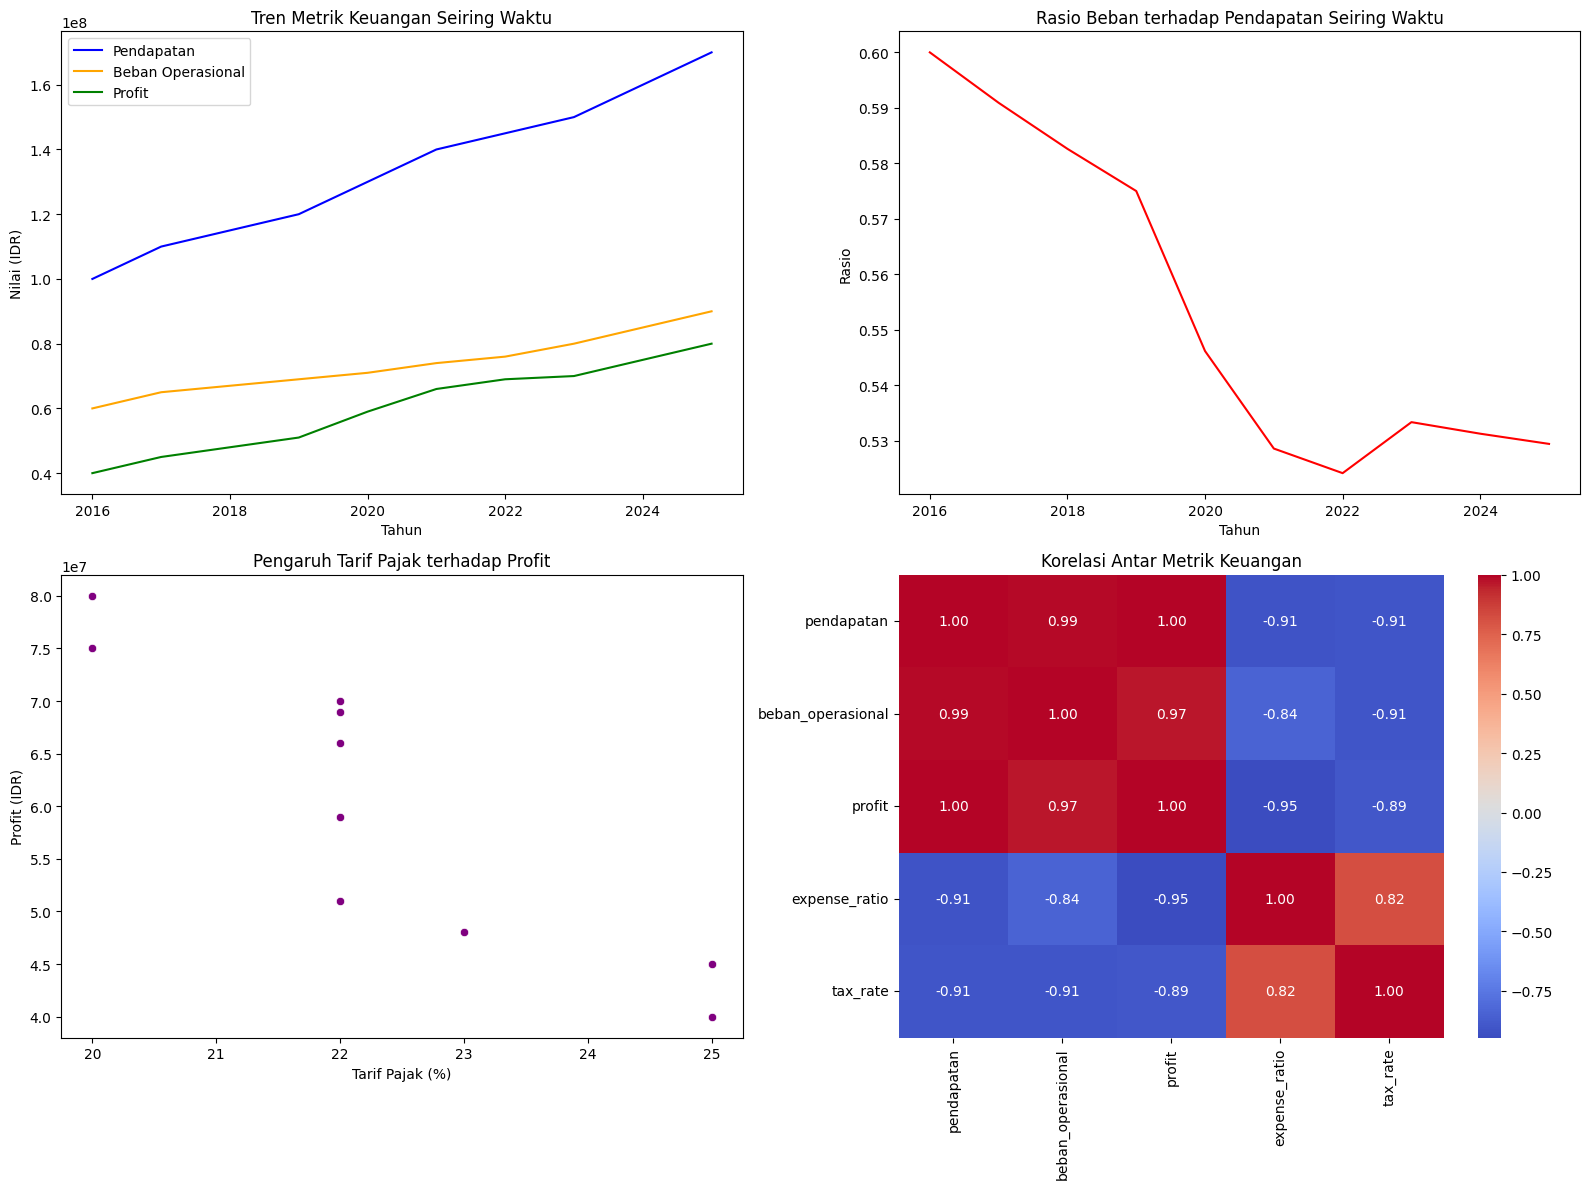

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# Plot 1: Trends of financial metrics over time
plt.subplot(2, 2, 1)
sns.lineplot(x='tahun', y='pendapatan', data=df_merged, label='Pendapatan', color='blue')
sns.lineplot(x='tahun', y='beban_operasional', data=df_merged, label='Beban Operasional', color='orange')
sns.lineplot(x='tahun', y='profit', data=df_merged, label='Profit', color='green')
plt.title('Tren Metrik Keuangan Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Nilai (IDR)')
plt.legend()


# Plot 2: Expense Ratio over time
plt.subplot(2, 2, 2)
sns.lineplot(x='tahun', y='expense_ratio', data=df_merged, color='red')
plt.title('Rasio Beban terhadap Pendapatan Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Rasio')


# Plot 3: Impact of tax rate on profit
plt.subplot(2, 2, 3)
sns.scatterplot(x='tax_rate', y='profit', data=df_merged, color='purple')
plt.title('Pengaruh Tarif Pajak terhadap Profit')
plt.xlabel('Tarif Pajak (%)')
plt.ylabel('Profit (IDR)')


# Plot 4: Correlation heatmap
plt.subplot(2, 2, 4)
correlation_matrix = df_merged[['pendapatan', 'beban_operasional', 'profit', 'expense_ratio', 'tax_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Metrik Keuangan')

plt.tight_layout()
plt.show()

## Summary:

### Q&A
There were no explicit questions in the provided task. However, the analysis implicitly answers questions about the relationships between financial metrics, the impact of tax rates, and trends over time.

### Data Analysis Key Findings
* **Data Cleaning:** No duplicate rows or missing values were found in any of the three datasets (`df_aset`, `df_transaksi`, `df_kebijakan`).  Several columns with numerical data stored as object types were converted to numeric types.  Rows with invalid numerical values (e.g., negative profit) were removed. The cleaning process did not remove any rows from any of the three dataframes.
* **Data Merging and Feature Engineering:** `df_transaksi` and `df_kebijakan` were successfully merged based on the 'tahun' column using an inner join, creating `df_merged`. New features 'profit' (revenue - operating expenses) and 'expense\_ratio' (operating expenses / revenue) were engineered.  Missing values in 'expense\_ratio' (likely due to division by zero) were filled with 0.
* **Data Visualization:**  Visualizations revealed trends in financial metrics (revenue, operating expenses, and profit) over time, the relationship between expense ratio and time, the impact of tax rates on profit, and correlations between various financial metrics.  The visualizations used line plots, scatter plots, and a correlation heatmap.

### Insights or Next Steps
* **Investigate the relationship between tax policies and profitability in more detail.** The scatter plot of tax rate versus profit suggests a potential correlation, but further analysis using regression or other statistical methods could provide more conclusive insights.
* **Explore the impact of other factors (not included in the data) on financial performance.**  External factors like economic conditions, market competition, or industry-specific trends might influence the observed patterns.  Incorporating these factors into future analyses could enhance the understanding of the business performance.
